<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/De_nuevo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📚 Aprendizaje Automático | 📊 Clustering
#👩‍🏫 Docente: Ingeniera en Sistemas Ana Diedrichs
#👨‍🎓 Alumno: Vargas Luciano


## Presentación y descripción del dataset.
### Data set elegido: Facebook Live Sellers in Thailand

Es un conjunto de datos de Páginas de Facebook de 10 vendedores minoristas tailandeses de moda y cosméticos. Publicaciones de diferente naturaleza (video, fotos, estados y enlaces). Las métricas de participación consisten en comentarios, acciones y reacciones.


In [198]:
# Importamos librerias necesarias
import pandas as pd
import numpy as np


In [199]:
# Cargamos el dataset
data = pd.read_csv("https://archive.ics.uci.edu/static/public/488/facebook+live+sellers+in+thailand.zip")

In [200]:
# Mostramos las 5 primeras filas
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [201]:
# Mostramosinformación general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [202]:
# Mostramos las dimenciones del dataset
data.shape

(7050, 16)

#Pre-procesamiento del dataset

In [203]:
# Buscar valores faltantes en el DataFrame
valores_faltantes = data.isnull().sum()

# Mostrar la cantidad de valores faltantes por columna
print(valores_faltantes)

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [204]:
# Eliminamos las columnas vacías y columnas que no nos interesan para el analisis
df = data.drop(columns=["Column1", "Column2", "Column3", "Column4", 'status_published'])

In [205]:
# Cambiamos los nombre de las columnas en inglés a español para una mehjor comprencion para hacer el analisis.
nombres_columnas = {
    'status_id': 'id_estado',
    'status_type': 'tipo_estado',
    'num_reactions': 'num_reacciones',
    'num_comments': 'num_comentarios',
    'num_shares': 'num_compartidos',
    'num_likes': 'num_me_gusta',
    'num_loves': 'num_me_encanta',
    'num_wows': 'num_asombros',
    'num_hahas': 'num_risas',
    'num_sads': 'num_tristezas',
    'num_angrys': 'num_enojos'
}

# Renombrar las columnas usando el diccionario
df = df.rename(columns=nombres_columnas)

In [206]:
# Crear variables dummy para la columna 'tipo_estado'
tipo_estado_dummy = pd.get_dummies(df['tipo_estado'], prefix='tipo_estado')

# Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, tipo_estado_dummy], axis=1)

# Eliminar la columna original 'tipo_estado'
df = df.drop('tipo_estado', axis=1)

In [207]:
# Mostarmos como cambio el data set con las variables duumies
df.head()

,id_estado,num_reacciones,num_comentarios,num_compartidos,num_me_gusta,num_me_encanta,num_asombros,num_risas,num_tristezas,num_enojos,tipo_estado_link,tipo_estado_photo,tipo_estado_status,tipo_estado_video
0,1,529,512,262,432,92,3,1,1,0,False,False,False,True
1,2,150,0,0,150,0,0,0,0,0,False,True,False,False
2,3,227,236,57,204,21,1,1,0,0,False,False,False,True
3,4,111,0,0,111,0,0,0,0,0,False,True,False,False
4,5,213,0,0,204,9,0,0,0,0,False,True,False,False


In [208]:
from sklearn.preprocessing import StandardScaler
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas numéricas para escalar (excluyendo las variables dummy)
columnas_numericas = ['num_reacciones', 'num_comentarios', 'num_compartidos', 'num_me_gusta', 'num_me_encanta', 'num_asombros', 'num_risas', 'num_tristezas', 'num_enojos']

# Ajustar el escalador a los datos y transformar el DataFrame
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])

El data frame quedo listo para aplicar algoritmos de clustering.

#Explicación del objetivo

Segmentaremos a los vendedores de Facebook Live en grupos con comportamientos de publicación y engagement similares.

**Explicación:**

Utilizando un algoritmo de clúster, buscamos agrupar a los vendedores en función de patrones en sus datos, como la frecuencia de publicación, el tipo de contenido que comparten (fotos, videos, estados), y las reacciones que reciben (likes, comentarios, compartidos). Esto nos permitiría identificar diferentes perfiles de vendedores, por ejemplo:

**Vendedores con alto engagement:** Aquellos que generan muchas reacciones, comentarios y compartidos en sus publicaciones.

**Vendedores con publicaciones virales:** Aquellos cuyas publicaciones se comparten con frecuencia.

**Vendedores enfocados en contenido visual:** Aquellos que publican principalmente fotos y videos.

El objetivo del clustering es obtener informacion más profunda de los vendedores y sus comportamientos, lo que permitira tomar mejores decisiones.

#Definimos rango de k


Se define el rango de valores de k (número de clústeres) que se evaluarán, en este caso de 2 a 10.

Inicializar listas: Se crean listas vacías para almacenar los valores de WCSS (Within-Cluster Sum of Squares) y el coeficiente de silueta.

Iterar sobre valores de k: Se itera sobre cada valor de k en el rango definido.

Se crea un modelo KMeans con el valor actual de k y un random_state para la reproducibilidad.

Se ajusta el modelo a los datos escalados.
Se calcula el WCSS (inertia) y se agrega a la lista wcss_values.

Se calcula el coeficiente de silueta y se agrega a la lista silhouette_values.

Graficamos el método del codo: Se crea un gráfico que muestra la relación entre el número de clústeres (k) y el WCSS. El punto donde la curva se "dobla" (como un codo) se considera un buen indicador del número óptimo de clústeres.

Graficar el coeficiente de silueta: Se crea un gráfico que muestra la relación entre el número de clústeres (k) y el coeficiente de silueta. El valor más alto del coeficiente de silueta indica una mejor separación entre los clústeres.
Cómo interpretar los resultados:

Método del codo: Busca el punto en el gráfico donde la disminución del WCSS se vuelve menos pronunciada (el "codo"). Este punto sugiere un buen número de clústeres.

Coeficiente de silueta: Busca el valor de k que maximiza el coeficiente de silueta. Un valor más alto indica una mejor estructura de clústeres.


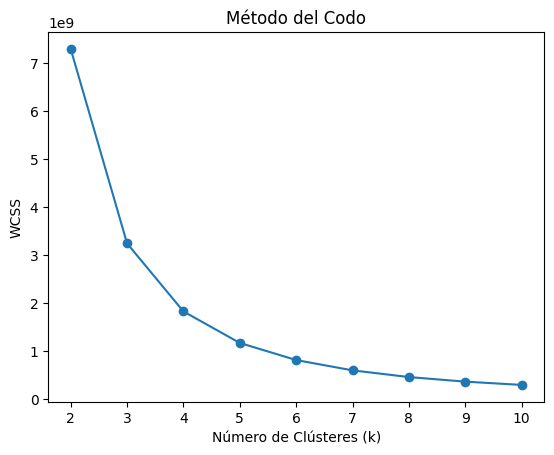

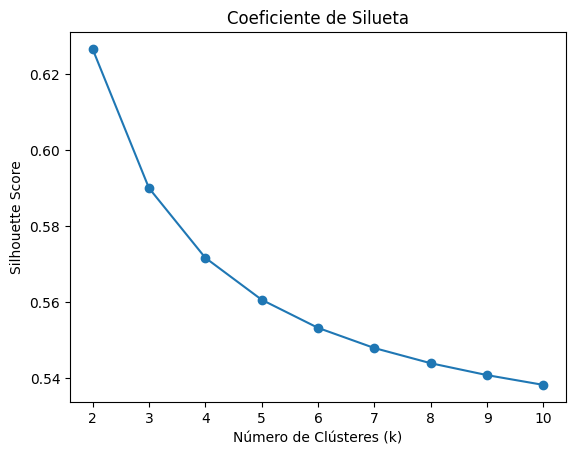

In [209]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Rango de valores de k a evaluar
k_values = range(2, 11)

# Listas para almacenar los valores de WCSS y silhouette score
wcss_values = []
silhouette_values = []

# Calcular WCSS y silhouette score para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)  # Usar el DataFrame escalado
    wcss_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(df, kmeans.labels_))

# Graficar el método del codo
plt.plot(k_values, wcss_values, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS')
plt.show()

# Graficar el coeficiente de silueta
plt.plot(k_values, silhouette_values, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')
plt.show()

##Podemos observar que K 5 es el mejor resultado

#Aplicacion de algoritmo KMeans


**N° de cluster:** Se define el número óptimo de clústeres (k), que se obtuvo del análisis del codo y silueta en el paso anterior **5.**

**Crear y ajustar el modelo:** Se crea un modelo KMeans con el valor de k y se ajusta a los datos escalados.

**Obtener etiquetas:** Se obtienen las etiquetas de los clústeres para cada punto de datos.

**Agregar etiquetas al DataFrame:** Se agrega una nueva columna llamada 'cluster' al DataFrame original, que contiene las etiquetas de los clústeres.

**Reducir la dimensionalidad con PCA:** Se crea un objeto PCA para reducir los datos a 2 dimensiones y se aplica a los datos escalados.

**Crear DataFrame para graficar:** Se crea un nuevo DataFrame (pca_df) que contiene las dos componentes principales y las etiquetas de los clústeres.

**Graficar los clústeres:** Se utiliza sns.scatterplot para graficar los puntos de datos, coloreándolos según su clúster.

In [210]:
# Determinar el número óptimo de clústeres (k)
# (Usar los resultados del análisis del codo y silueta)
# Supongamos que el número óptimo es 3
k = 5

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(df)

# Obtener las etiquetas de los clústeres para cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
df['cluster'] = labels

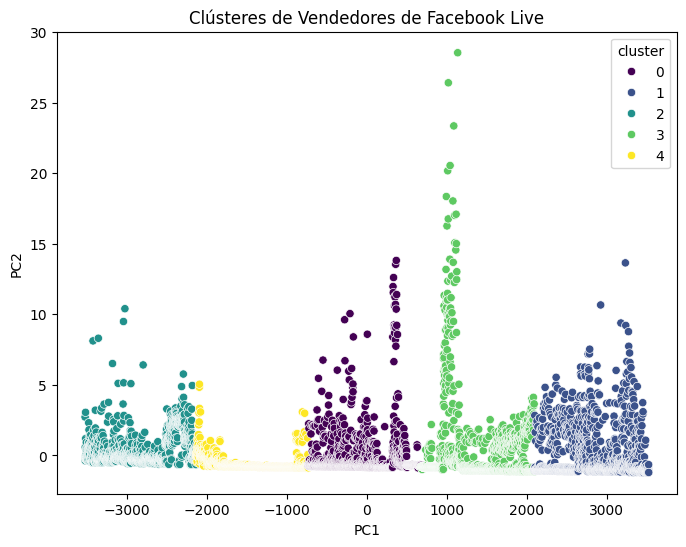

In [211]:
import seaborn as sns
from sklearn.decomposition import PCA

# Crear un objeto PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

# Ajustar PCA a los datos escalados y transformar
principalComponents = pca.fit_transform(df)

# Crear un DataFrame con las componentes principales y las etiquetas de los clústeres
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels

# Graficar los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clústeres de Vendedores de Facebook Live')
plt.show()

#Aplicacion de aglomerativo jerárquico
**N° de clusters: 5**

El clustering aglomerativo jerárquico es un algoritmo que construye una jerarquía de clusters.
Comienza tratando cada punto de datos como un cluster individual.
Luego, fusiona iterativamente los clusters más cercanos hasta que se alcanza el número deseado de clusters (n_clusters).
El método linkage determina cómo se calcula la distancia entre clusters.

In [212]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')# Define el método para calcular la distancia entre clusters.
agglomerative.fit(df);
labels = agglomerative.labels_
df['cluster_agglomerative'] = labels

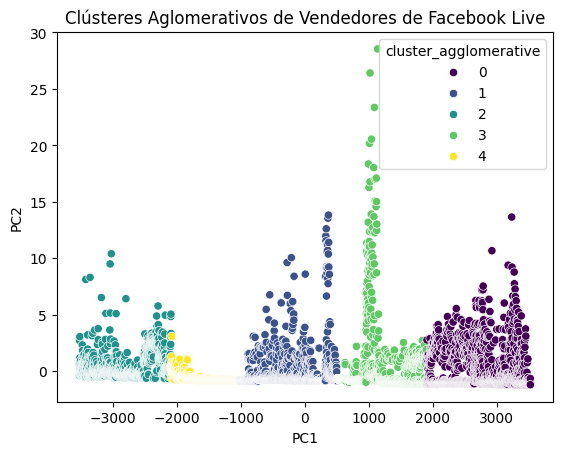

In [213]:
# ... (código de PCA similar al que ya tienes) ...
pca_df['cluster_agglomerative'] = labels
sns.scatterplot(x='PC1', y='PC2', hue='cluster_agglomerative', data=pca_df, palette='viridis')
plt.title('Clústeres Aglomerativos de Vendedores de Facebook Live')
plt.show()

# **Conclusiones sobre el Análisis**

Implementamos dos algoritmos de clustering (KMeans y aglomerativo jerárquico) para segmentar el data set en 5 grupos. La visualización de los clusters mediante PCA permitió observar la distribución de los grupos y su separación.

**Posibles interpretaciones de los clusters:**

Cluster 1: Vendedores con alto engagement.

Cluster 2: Vendedores con publicaciones virales.

Cluster 3: Vendedores enfocados en contenido visual.

Cluster 4: Vendedores con bajo engagement.

Cluster 5: Vendedores con un comportamiento mixto.



Ambos algoritmos se aplicaron con el mismo número de clusters (k=5), lo que permite comparar sus resultados y sacar conclusiones sobre su desempeño en este caso particular.

**Conclusión final:**

Ambos algoritmos, KMeans y Aglomerativo Jerárquico, demostraron ser efectivos para segmentar a los vendedores losdatos con características distintivas.
La elección del algoritmo ideal dependerá de las necesidades específicas del análisis y del dataset utilizado.

